##### Bank Account Fraud Dataset Suite (NeurIPS 2022)-linear SVM
---

This notebook contains the following: 
* Import/install Python packages and libraries 
* Load your data: Replace the your_data.csv with your dataset. 
* Make sure your target column is binary (e.g., 0 and 1). 
* Define features and target: Specify X (features) and y (target) variables in the notebook. 
* Run the preprocessing steps: use pipeline to process  
* Appy smote to generate synthetic data 
* Train the model: A Linear SVM (LinearSVC) will be trained on the training data. 
* Evaluate the model: Accuracy, confusion matrix, and ROC curves will be generated. 
* Visualize performance: confusion Matrix 
* ROC curves for both class 0 and class 1 are plotted. 

In [2]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
# load dataset
X_train = pd.read_csv("data/X_train.csv", index_col=False)
X_test = pd.read_csv("data/X_test.csv", index_col=False)
y_train = pd.read_csv("data/y_train.csv", index_col=False)
y_test = pd.read_csv("data/y_test.csv", index_col=False)
X_train.head()

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,...,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.179821,-0.394881,1.688175,0.328468,-1.116477,2.016399,-0.522561,-0.107872,0.0,-1.488217
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.235139,-0.368778,0.297483,-0.604568,1.312273,-0.648666,1.887050,-0.107872,0.0,-1.488217
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.210988,-0.377479,0.694824,-0.590214,-1.203218,-0.648666,0.952063,-0.107872,0.0,-1.488217
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.178809,-0.399231,-0.695869,-0.575859,0.965309,-0.648666,-0.475382,-0.107872,0.0,-1.488217
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.768171,1.132133,-0.894539,0.041380,1.312273,-0.648666,-0.071729,-0.107872,0.0,-1.488217


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape

(1483302, 47)

In [16]:
#ensure the SMOTE is working
import numpy as np
print("Before SMOTE:", y_train.shape)
print("After SMOTE:", y_train_resampled.shape)

Before SMOTE: (750000, 1)
After SMOTE: (1483302, 1)


In [10]:
from sklearn.svm import LinearSVC

In [12]:
# train the model 
model = LinearSVC(random_state=42, max_iter=10000, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled["fraud_bool"])

LinearSVC(class_weight='balanced', max_iter=10000, random_state=42)

In [14]:
# predict
y_pred = model.predict(X_test)

In [15]:
# evaluate the performance 
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test["fraud_bool"], y_pred))
print(classification_report(y_test, y_pred))

[[204107  43213]
 [   688   1992]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.90    247320
           1       0.04      0.74      0.08      2680

    accuracy                           0.82    250000
   macro avg       0.52      0.78      0.49    250000
weighted avg       0.99      0.82      0.89    250000



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

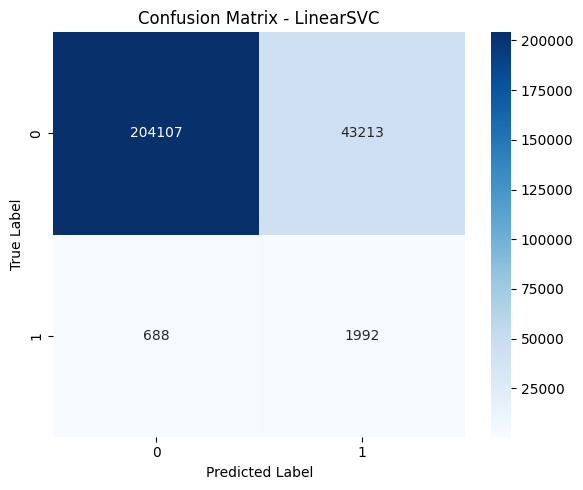

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LinearSVC")
plt.tight_layout()
plt.show()

In [19]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [21]:
#show the ROC curve
y_scores = model.decision_function(X_test)

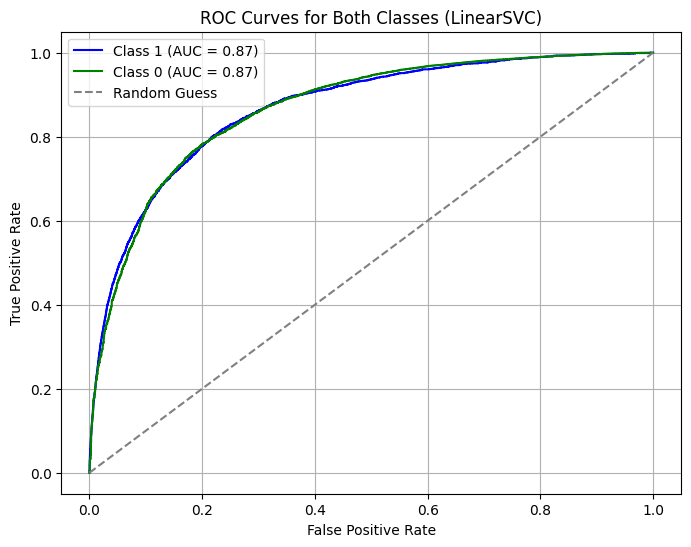

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Original scores and labels
y_scores = model.decision_function(X_test)

# ROC for class 1 (positive class)
fpr1, tpr1, _ = roc_curve(y_test, y_scores)
roc_auc1 = roc_auc_score(y_test, y_scores)

# ROC for class 0 — flip labels and scores
fpr0, tpr0, _ = roc_curve(1 - y_test, -y_scores)
roc_auc0 = roc_auc_score(1 - y_test, -y_scores)

# Plot both
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'Class 1 (AUC = {roc_auc1:.2f})', color='blue')
plt.plot(fpr0, tpr0, label=f'Class 0 (AUC = {roc_auc0:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Both Classes (LinearSVC)')
plt.legend()
plt.grid(True)
plt.show()